In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [4]:
df=pd.read_csv('../08-Linear-Regression-Models/Advertising.csv')

In [5]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [10]:
X=df.drop('sales',axis=1)
y=df['sales']

In [107]:
from sklearn.preprocessing import PolynomialFeatures

In [138]:
polynomical_convertor = PolynomialFeatures(degree=2,include_bias=False)

In [139]:
polynomical_convertor.fit(X)

PolynomialFeatures(include_bias=False)

In [140]:
poly_features=polynomical_convertor.transform(X)

In [141]:
X.shape

(200, 3)

In [142]:
poly_features.shape

(200, 9)

In [143]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [144]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [145]:
polynomical_convertor.fit_transform(X)

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

In [146]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [147]:
from sklearn.linear_model import LinearRegression

In [148]:
model=LinearRegression()

In [149]:
model.fit(X_train,y_train)

LinearRegression()

In [150]:
test_pred=model.predict(X_test)

In [151]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [152]:
MAE=mean_absolute_error(y_test,test_pred)

In [153]:
MSE=mean_squared_error(y_test,test_pred)

In [154]:
RMSE=np.sqrt(MSE)

In [155]:
MAE

0.4896798044803838

In [156]:
MSE

0.4417505510403753

In [157]:
RMSE

0.6646431757269274

In [158]:
model.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

/home/mustafa/Desktop/ML/first/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


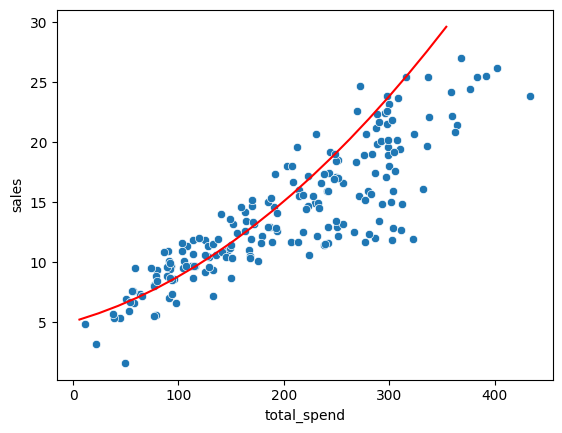

In [159]:
# create diffr order polynomial
# split poly freatures
# fit on train
# store/save rmse for both train and test
# plot the results(error vs poly order)


df_res=pd.DataFrame()
df_res['total_spend']=df['TV']+df['radio']+df['newspaper']
df_res['sales']=df['sales']
pot_spend=pd.DataFrame(np.linspace(0,120,60).reshape(20,3))
pot_spend.sum()
potSpend=polynomical_convertor.transform(pot_spend)
polynomical_convertor.fit_transform(pot_spend)
potPred=model.predict(potSpend)
sns.scatterplot(x='total_spend',y='sales',data=df_res)
plt.plot(np.array(pot_spend.sum(axis=1)),np.array(potPred),color='red')


In [160]:
train_rmse_errors=[]
test_rmse_errors=[]
for d in range(1,10):
    poly_convertor=PolynomialFeatures(degree=d,include_bias=False)
    poly_features=poly_convertor.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
    model=LinearRegression()
    model.fit(X_train,y_train)
    train_pred=model.predict(X_train)
    test_pred=model.predict(X_test)
    
    train_rmse=np.sqrt(mean_squared_error(y_train,train_pred))
    test_rmse=np.sqrt(mean_squared_error(y_test,test_pred))
    train_rmse_errors.append(train_rmse)
    test_rmse_errors.append(test_rmse)

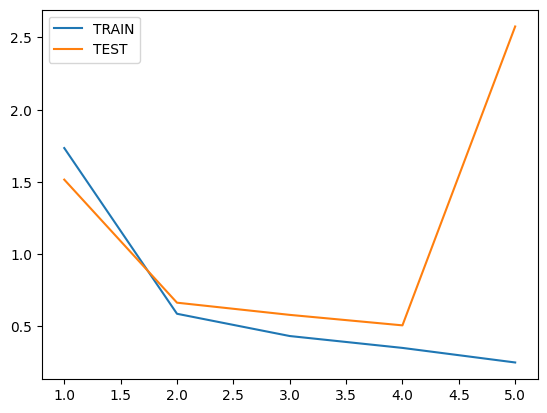

In [161]:
plt.plot(range(1,6),train_rmse_errors[0:5],label='TRAIN')
plt.plot(range(1,6),test_rmse_errors[0:5],label='TEST')
plt.legend()

In [172]:
final_poly_convertor=PolynomialFeatures(degree=2,include_bias=False)
final_model=LinearRegression()

In [173]:
full_converted_X=final_poly_convertor.fit_transform(X)
final_model.fit(full_converted_X,y)

LinearRegression()

In [174]:
from joblib import  dump,load

In [175]:
dump(final_model,'final_poly_model.joblib')

['final_poly_model.joblib']

In [176]:
dump(final_poly_convertor,'final_convertor.joblib')

['final_convertor.joblib']

In [177]:
loaded_converter=load('final_convertor.joblib')

In [178]:
loaded_model=load('final_poly_model.joblib')

In [251]:
campaign=[[360,1203,23]]

In [252]:
transformed_data=loaded_converter.fit_transform(campaign)

In [253]:
predictions=loaded_model.predict(transformed_data)

In [254]:
predictions

array([677.63837852])